# **1. Problem Definition:**

In this project, we worked with an EEG dataset containing multichannel brain signals, and our goal was to prepare this data for classification and clustering. EEG data is naturally noisy, contains sudden spikes, and varies widely across channels, so proper preprocessing is essential before applying machine learning techniques.


The main problem we addressed in this phase was *cleaning*, *understanding*, and *preparing* the EEG data so that it can be used in later stages for Decision Tree classification and K-Means clustering.
To achieve this, we analyzed the dataset, explored its structure, and applied several preprocessing techniques based on the issues we observed.


#2.Data Mining Tasks:
**2.1 Classification Task:**

We prepared the dataset for a multi-class classification problem. The label column contains four classes (0, 1, 2, 3), and later in the project, we trained Decision Tree models using both Gini and Entropy criteria.
Our preprocessing work in this phase ensures that the classification models will have clean, normalized, and consistent inputs.

**2.2 Clustering Task:**

We also prepared the dataset for unsupervised clustering using K-Means.
Since clustering does not rely on labels, we focused on producing a high-quality, noise-reduced, and well-scaled feature set.
This preparation helps improve silhouette scores and cluster compactness later in the project.


#3.Data Description
Before preprocessing, we examined the dataset to understand its structure and characteristics.
3.1 Overview of the Dataset
-The dataset contains 8000 EEG samples.
-Each sample includes 16 EEG channels (Channel1–Channel16).
There is one label column with four classes.-
All columns are numeric, and we found no missing values.-


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns



#3.2 Sample of Raw Data
We viewed the first rows of the dataset to get a sense of the raw values. The channels ranged between approximately −300 and +300, and the data appeared unscaled and noisy.


In [2]:
#  Load dataset
EEG = pd.read_csv("BEED_data.csv")


# Display first 5 rows
EEG.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0


In [3]:
for i in range(1, 17):
  # Convert all channel columns to numeric
    EEG[f"Channel{i}"] = pd.to_numeric(EEG[f"Channel{i}"], errors='coerce')

#3.3 Statistical Summary
We examined descriptive statistics and histograms for all 16 channels.
We found that:
Most features were centered around zero.-
Several features had long tails and extreme values.-
-The wide range and presence of spikes confirmed the need for normalization and noise removal.


**=== EEG Dataset Overview ===**

In [4]:
# Dataset information
EEG.info()

# Descriptive statistics for numeric columns
EEG.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Channel1   8000 non-null   int64
 1   Channel2   8000 non-null   int64
 2   Channel3   8000 non-null   int64
 3   Channel4   8000 non-null   int64
 4   Channel5   8000 non-null   int64
 5   Channel6   8000 non-null   int64
 6   Channel7   8000 non-null   int64
 7   Channel8   8000 non-null   int64
 8   Channel9   8000 non-null   int64
 9   Channel10  8000 non-null   int64
 10  Channel11  8000 non-null   int64
 11  Channel12  8000 non-null   int64
 12  Channel13  8000 non-null   int64
 13  Channel14  8000 non-null   int64
 14  Channel15  8000 non-null   int64
 15  Channel16  8000 non-null   int64
 16  Label      8000 non-null   int64
dtypes: int64(17)
memory usage: 1.0 MB


,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-1.490375,-2.189375,-3.23750,-4.119375,-1.821625,-2.311750,-3.398125,-3.448625,-1.647875,-2.56125,-3.524500,-4.782750,-2.164000,-2.910875,-4.355375,-4.113750,1.500000
std,36.824213,36.108088,35.80249,36.285268,37.621284,36.306006,36.358395,36.522214,38.107721,37.54068,37.343938,37.469582,38.144075,36.640555,36.242793,35.933601,1.118104
min,-281.000000,-255.000000,-255.00000,-257.000000,-264.000000,-277.000000,-277.000000,-260.000000,-290.000000,-302.00000,-276.000000,-306.000000,-288.000000,-290.000000,-323.000000,-317.000000,0.000000
25%,-7.000000,-7.000000,-7.00000,-10.000000,-10.000000,-8.000000,-8.000000,-7.000000,-7.000000,-8.00000,-8.000000,-11.000000,-10.000000,-8.000000,-9.000000,-6.000000,0.750000
50%,0.000000,0.000000,-1.00000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.00000,-1.000000,-2.000000,0.000000,0.000000,-2.000000,-1.000000,1.500000
75%,8.000000,8.000000,5.00000,7.000000,10.000000,8.000000,6.000000,5.000000,8.000000,8.00000,5.000000,7.000000,10.000000,9.000000,5.000000,4.000000,2.250000
max,252.000000,261.000000,238.00000,246.000000,249.000000,245.000000,220.000000,271.000000,280.000000,251.00000,262.000000,283.000000,296.000000,291.000000,251.000000,270.000000,3.000000


In [5]:
five_num_summary = EEG.describe().loc[['min','25%','50%','75%','max']]
five_num_summary


,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
min,-281.0,-255.0,-255.0,-257.0,-264.0,-277.0,-277.0,-260.0,-290.0,-302.0,-276.0,-306.0,-288.0,-290.0,-323.0,-317.0,0.00
25%,-7.0,-7.0,-7.0,-10.0,-10.0,-8.0,-8.0,-7.0,-7.0,-8.0,-8.0,-11.0,-10.0,-8.0,-9.0,-6.0,0.75
50%,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-2.0,0.0,0.0,-2.0,-1.0,1.50
75%,8.0,8.0,5.0,7.0,10.0,8.0,6.0,5.0,8.0,8.0,5.0,7.0,10.0,9.0,5.0,4.0,2.25
max,252.0,261.0,238.0,246.0,249.0,245.0,220.0,271.0,280.0,251.0,262.0,283.0,296.0,291.0,251.0,270.0,3.00


#3.4 Class Distribution
We checked the distribution of the classes and found that:
-Each class (0, 1, 2, 3) has exactly 2000 samples.
-This means the dataset is perfectly balanced, and we did not need to apply any oversampling or undersampling techniques.

**=== Class Distribution ===**

In [6]:
# Count records per class
class_distribution = EEG['Label'].value_counts()

# Convert to DataFrame for better display
class_distribution_table = pd.DataFrame({
    'Class': class_distribution.index,
    'Count': class_distribution.values
})

class_distribution_table


,Class,Count
0,0,2000
1,1,2000
2,2,2000
3,3,2000


**=== Missing Data Analysis ===**

In [7]:
# Count missing values per column
missing_count = EEG.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(EEG)) * 100

# Combine results into one table
missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

missing_table


,Missing Values,Percentage (%)
Channel1,0,0.0
Channel2,0,0.0
Channel3,0,0.0
Channel4,0,0.0
Channel5,0,0.0
Channel6,0,0.0
Channel7,0,0.0
Channel8,0,0.0
Channel9,0,0.0
Channel10,0,0.0


**=== Distribution of Numeric Attributes ===**

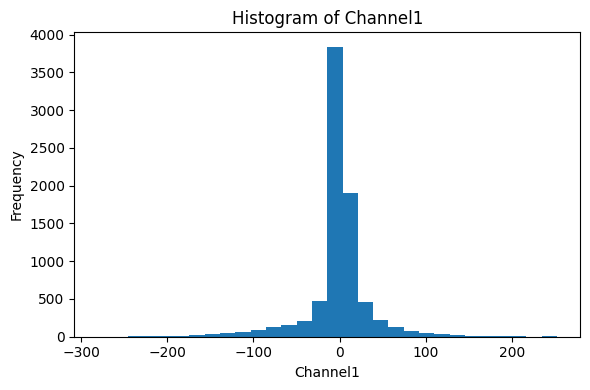

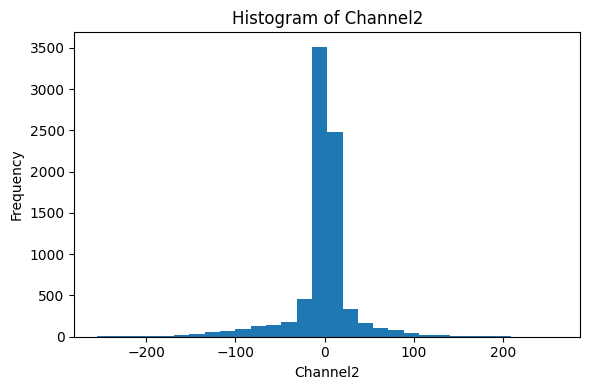

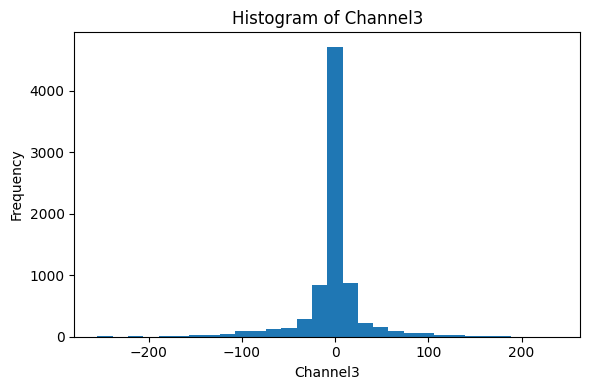

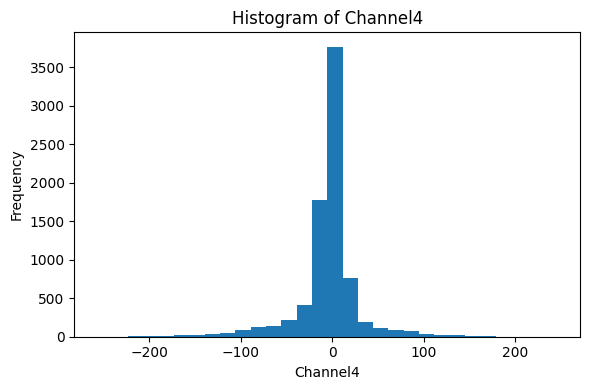

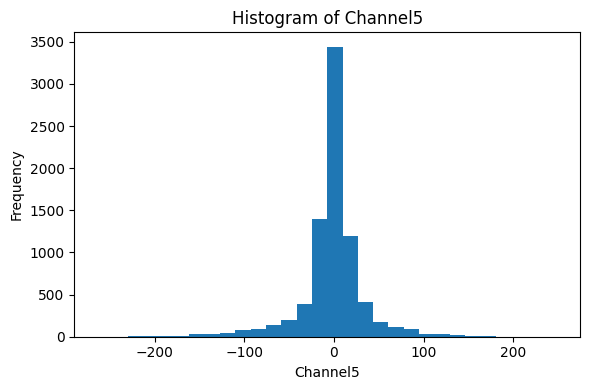

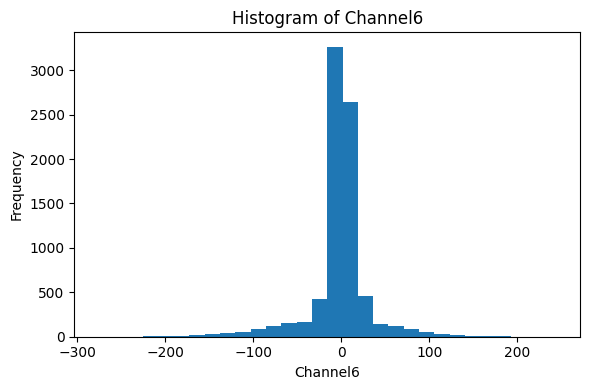

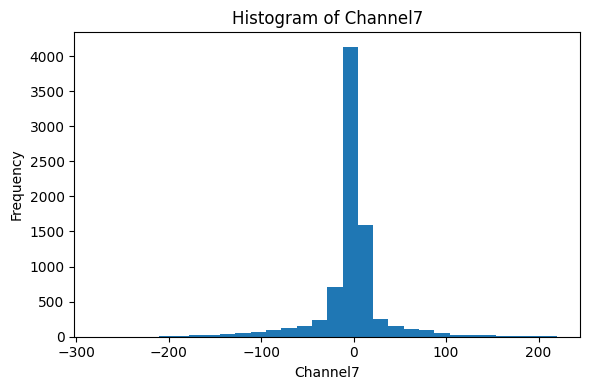

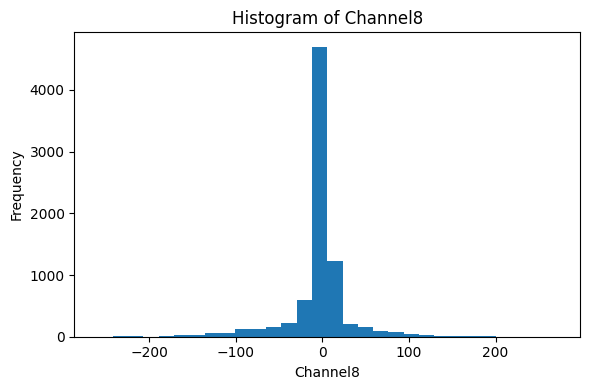

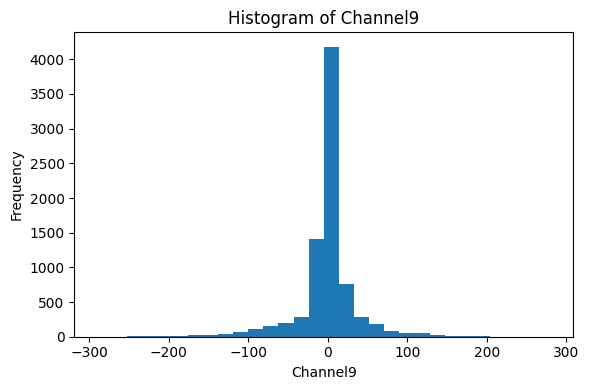

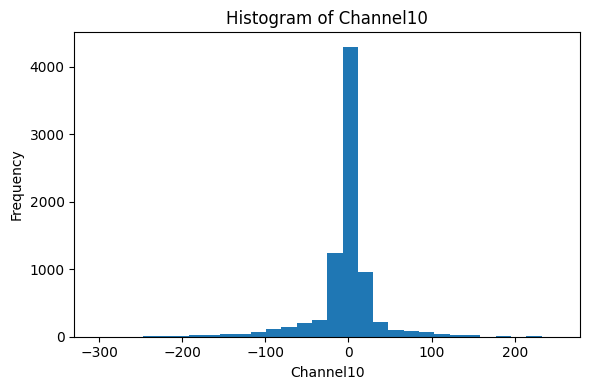

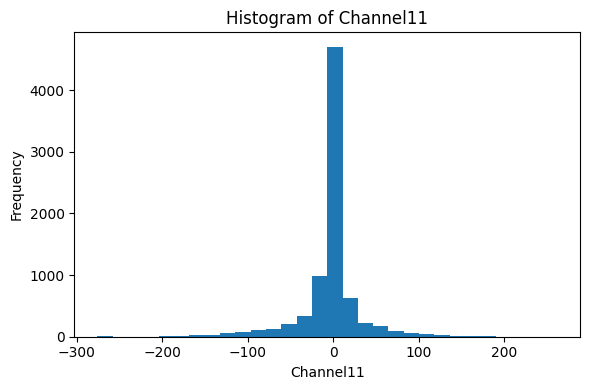

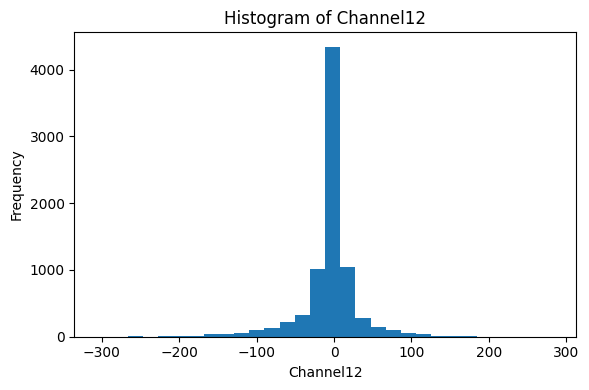

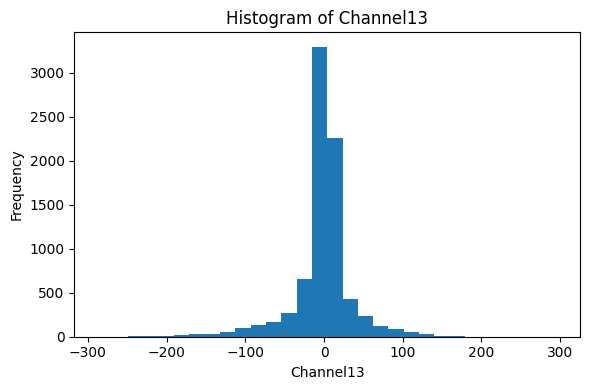

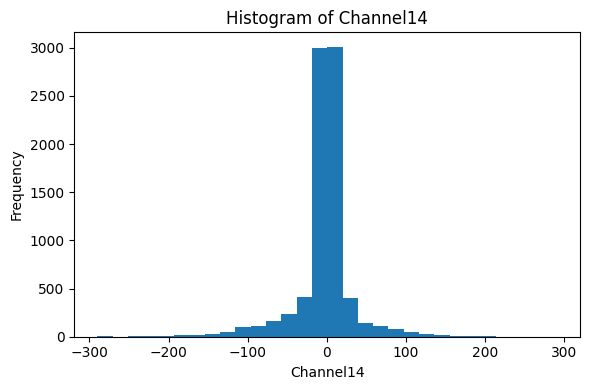

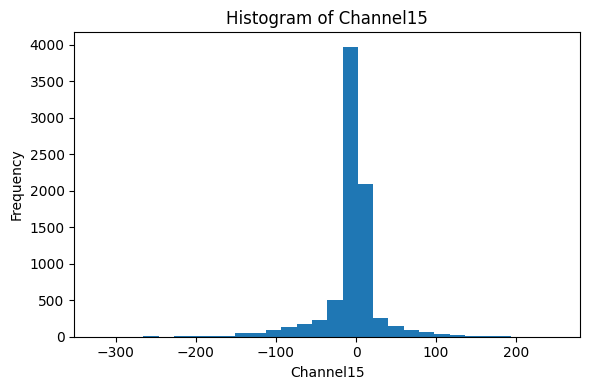

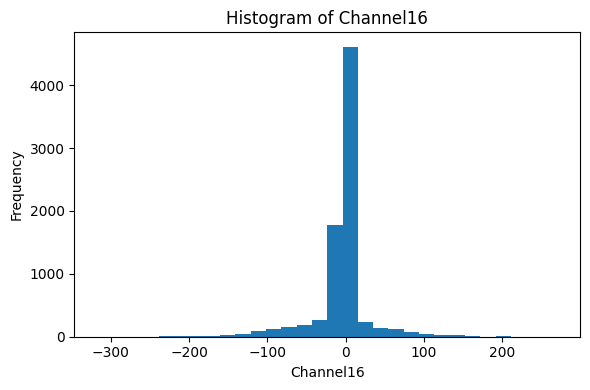

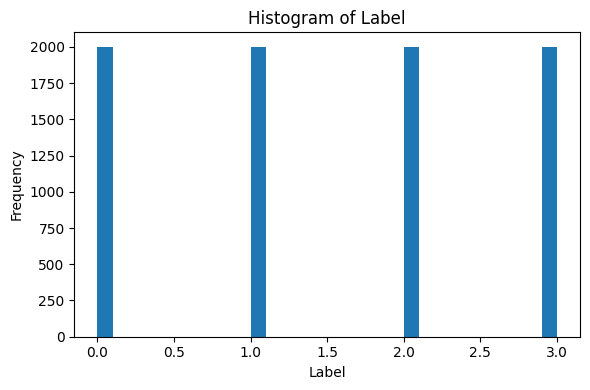

In [8]:
# Select numeric columns
num_cols = EEG.select_dtypes(include=['number']).columns.tolist()

# Plot each numeric column in a separate histogram
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(EEG[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()








**Description of the Plots**

The histograms provide a visual representation of the distribution of values for each numeric attribute (Channel 1 - Channel 16). The horizontal axis (x-axis) displays the range of values observed for each feature, while the vertical axis (y-axis) shows the frequency of records within specific intervals (bins).

From the graphs, it is evident that most features are centered around zero, with values tapering off toward both extremes. This pattern suggests that the data approximate a normal distribution, although some features exhibit skewness and long tails, indicating the presence of outliers. The histogram of the target variable (Label) demonstrates that the dataset is evenly distributed across the four classes (0, 1, 2, 3), confirming a balanced classification problem.

**Importance for Preprocessing**

Analyzing histograms plays a crucial role in preparing the dataset for machine learning:

Outlier Detection: The long tails in several features highlight potential outliers. These extreme values may distort the learning process and require handling through removal, transformation, or capping.

Distribution Shape: Certain features exhibit skewness, which may necessitate transformations (e.g., logarithmic or Box-Cox) to approximate normality. Many machine learning algorithms perform better with normally distributed inputs.

Feature Scaling: The ranges of values differ across features, as highlighted by the histograms. Standardization or normalization is required to ensure all attributes contribute proportionally to model training.

Feature Relevance: Features that show very little variation (nearly flat histograms) provide minimal discriminatory information. Such attributes may be excluded during feature selection to improve efficiency and reduce noise.




**=== Bar Chart of Class Distribution ===**

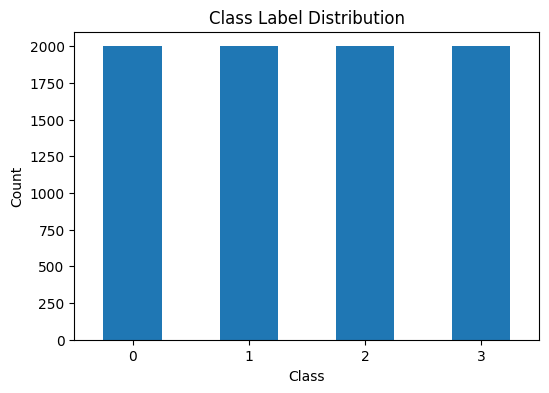

In [9]:
# Create a new figure with size 6x4 inches
plt.figure(figsize=(6,4))
# Count how many samples belong to each class in the "Label" column
# and create a bar plot of these counts
EEG["Label"].value_counts().plot(kind="bar")
# Add a title to the plot
plt.title("Class Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
# Keep the x-axis labels horizontal for readability
plt.xticks(rotation=0)
plt.show()

**Description of the Plot:**

The bar chart illustrates the frequency of records for each class in the target variable (Label). Each bar corresponds to one of the four classes (0, 1, 2, and 3), and the height of the bar represents the number of records in that class.

**What the Plot Shows:**

The visualization provides a clear overview of how the dataset is distributed across the four classes. In this case, all bars are of approximately equal height, indicating that the dataset is well-balanced among the classes. This balance suggests that no single class dominates the dataset, which reduces the risk of model bias toward a majority class.

**Why This is Important for Preprocessing:**

Examining the class distribution is a critical preprocessing step in classification tasks. A balanced dataset, as shown here, is advantageous because it ensures that the machine learning model will have sufficient training examples for each class. In situations where imbalance is present, models often struggle to correctly classify minority classes. However, since the dataset appears balanced across all four categories, advanced resampling or weighting techniques may not be necessary, and the focus of preprocessing can instead shift toward feature scaling, outlier handling, and noise reduction.

**=== Count Records per Class ===**

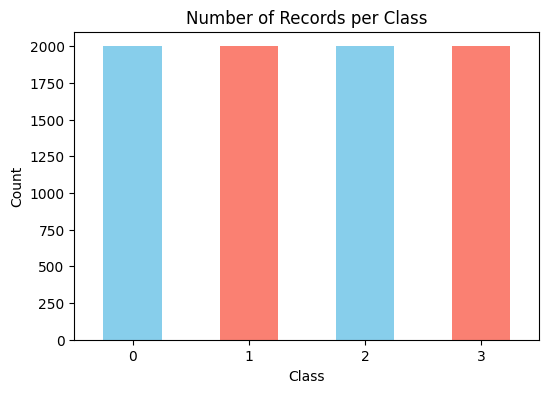

In [10]:
# Count records per class
class_counts = EEG["Label"].value_counts()

# Bar chart
plt.figure(figsize=(6,4))
# Plot the class counts as a bar chart, using two colors for the bars
class_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Number of Records per Class")
plt.xlabel("Class")
plt.ylabel("Count")
# Keep class labels horizontal
plt.xticks(rotation=0)
plt.show()

**What the Plot Shows**

The bar chart presents the number of records that belong to each class in the target variable (Label). Each bar corresponds to one of the four classes (0, 1, 2, and 3), and the height of the bar shows how many records are in that group. In this case, the bars are of almost equal height, which means the dataset is well-balanced across the four classes. This indicates that each class has a similar number of records.

**Why This is Important for Preprocessing**

Understanding how many records belong to each class is an important step before building a classification model. If one class had far more records than the others (class imbalance), the model could become biased toward predicting the majority class and perform poorly on minority classes. Since this dataset shows a balanced class distribution, the risk of bias is reduced, and no special resampling or class weighting is immediately necessary. Instead, preprocessing efforts can focus more on tasks such as feature scaling, outlier handling, and noise reduction, which will help improve model performance.

**=== Bivariate Scatter Plot of Channel 1 and Channel 1 ===**

In [11]:
# Convert Label column to integers
EEG["Label"] = pd.to_numeric(EEG["Label"], errors="coerce")

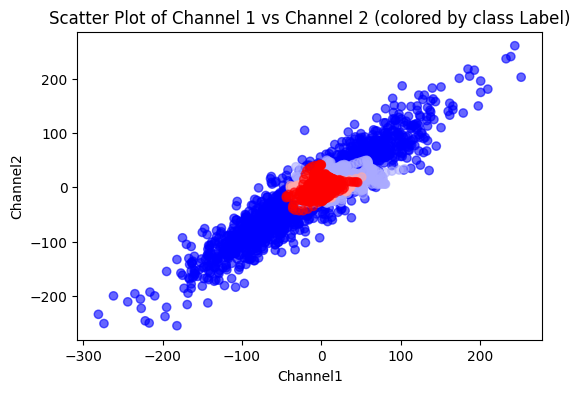

In [12]:
# Scatter plot of two features (Channel 1 and Channel 2), colored by class label (Label)
plt.figure(figsize=(6,4))
# Scatter plot:
# - x-axis: values from Channel1
# - y-axis: values from Channel2
# - c: color each point based on its class label
# - cmap: color map "bwr" (blue for one class, red for the other)
# - alpha: make points slightly transparent (0.6)
plt.scatter(EEG["Channel1"], EEG["Channel2"], c=EEG["Label"], cmap="bwr", alpha=0.6)
# -title for the plot
plt.title("Scatter Plot of Channel 1 vs Channel 2 (colored by class Label)")
plt.xlabel("Channel1")
plt.ylabel("Channel2")
plt.show()

**What the Plot Shows:**

The scatter plot illustrates the relationship between the two numeric features Channel 1 and Channel 2. Each point represents one record, with the color indicating its class label (Label = 0 in blue, Label = 1 in red). The points form an upward-sloping pattern, which indicates a positive correlation between Channel 1 and Channel 2 (as values of Channel 1 increase, values of Channel 2 also tend to increase).

In terms of class separation, the plot shows that the two classes overlap substantially in this feature space. While class 1 points (red) are somewhat concentrated around the center, class 0 points (blue) are more widely spread, covering a much larger range. This overlap suggests that Channel 1 and Channel 2 alone may not be sufficient for perfect classification.


**Why This is Important for Preprocessing:**

- **Correlation Analysis:** The positive correlation between Channel 1 and Channel 2 indicates potential redundancy. Highly correlated features may be reduced using dimensionality reduction techniques (e.g., PCA) to simplify the dataset without losing much information.

- **Class Separability:** The visible overlap between classes suggests that additional features or transformations will be required for the model to distinguish between them effectively.

- **Scaling Needs:** The wide spread of data values (ranging from approximately –300 to +200) highlights the importance of applying feature scaling (standardization or normalization) before model training to ensure all features contribute fairly.

- **Outlier Detection:** A few points lie farther from the main cluster, which may represent outliers. Detecting and treating such values can prevent them from negatively influencing the model.

#4.Data Preprocessing
After analyzing the dataset, we applied several preprocessing techniques to improve the quality of the data.


#4.1 Missing Value Check
We started by checking for missing values in all columns.
Based on our analysis:
There were 0 missing values across all columns.
Because of that, we did not need to perform any imputation.


In [13]:
# Check for missing values
# Count the number of missing (null) values in each column of the dataset
missing = EEG.isnull().sum()

print("Missing values per column:\n", missing)
# Check if the total number of missing values is zero
if missing.sum() == 0:
    print("\n No missing values detected.")
else:
    print("\n Dataset contains missing values")



Missing values per column:
 Channel1     0
Channel2     0
Channel3     0
Channel4     0
Channel5     0
Channel6     0
Channel7     0
Channel8     0
Channel9     0
Channel10    0
Channel11    0
Channel12    0
Channel13    0
Channel14    0
Channel15    0
Channel16    0
Label        0
dtype: int64

 No missing values detected.


#4.3 Outlier Detection (IQR Method)
We detected outliers using the IQR (Interquartile Range) method.
For each channel:
We calculated Q1, Q3, and IQR.
Any value outside [Q1 – 1.5×IQR, Q3 + 1.5×IQR] was considered an outlier.

*Based on this process:
36.162% of rows contained at least one outlier.
Channels such as Channel11, Channel9, and Channel16 showed the highest outlier counts.
This confirmed that a noise-reduction step was necessary.*

**What This Step Does:**

We detect extreme values in the EEG feature columns using the IQR rule, then smooth the signal with median binning.

For each channel (columns starting with “Channel” or “X”, excluding the label), we compute Q1, Q3, and IQR, and define Tukey limits: [Q1 − 1.5×IQR, Q3 + 1.5×IQR].

We apply bin median smoothing with a bin size of 10 rows, replacing each bin’s values by its median to damp spikes while keeping all rows.

**Why This Is Important:**

Outliers and sudden spikes distort EEG statistics and can degrade model training. Using the IQR rule together with median binning reduces noise without deleting rows, yielding cleaner, more stable signals that better represent the underlying pattern.

#4.4 Noise Removal (Median Binning)
To reduce noise without removing any rows, we applied median binning smoothing:
We divided the data into bins of size 10.
We replaced each bin’s values with the median of that bin.


Detecting Outliers Step:



In [14]:

#  1) Select the feature columns (those starting with "Channel"), excluding the target column 'y'
features = [c for c in EEG.columns if (c.lower().startswith("channel") ) and c.lower() != "y"]

# 2) Define a helper function to calculate IQR-based lower and upper bounds
# (the rule: 1.5 * IQR)
IQR_MULT = 1.5
def iqr_bounds(s, mult=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return (q1 - mult*iqr, q3 + mult*iqr)

# 3) Create per-column outlier masks
# (Compute the IQR bounds for each column and flag values outside this range)
masks = {}
for col in features:
    low, high = iqr_bounds(EEG[col], IQR_MULT)
    masks[col] = (EEG[col] < low) | (EEG[col] > high)

out = pd.DataFrame(masks, index=EEG.index)

# 4) Summarize outlier counts and percentages per column
n = len(EEG)
col_counts = out.sum().astype(int)
summary = (
    pd.DataFrame({
        "Outliers": col_counts,
        "Percent%": (col_counts / n * 100).round(3)
    })
    .sort_values("Outliers", ascending=False)
)

# 5) Calculate overall number and percentage of rows containing at least one outlier
overall = out.any(axis=1).sum()
overall_pct = overall / n * 100

print(f"Rows: {n:,}")
print(f"Rows with any outlier: {overall:,}  ({overall_pct:.3f}%)\n")
display(summary)


Rows: 8,000
Rows with any outlier: 2,893  (36.162%)



,Outliers,Percent%
Channel11,1680,21.000
Channel9,1613,20.162
Channel16,1574,19.675
Channel3,1564,19.550
Channel1,1550,19.375
Channel8,1519,18.987
Channel7,1444,18.050
Channel15,1406,17.575
Channel2,1367,17.088
Channel12,1336,16.700


In [15]:
# Handling step:
#  Smooth the data using binning (median)
EEG_smooth = EEG.copy()
bin_size = 10  # Define number of rows per bin (can be adjusted as needed)

# For each feature column, replace values with the median of their bin
for col in features:
    EEG_smooth[col] = EEG[col].groupby(EEG.index // bin_size).transform('median')


In [16]:
# 1) Compute IQR bounds from the original dataset (once per column)
orig_bounds = {}
for col in features:
    low, high = iqr_bounds(EEG[col], IQR_MULT)  # Using the same helper function defined earlier
    orig_bounds[col] = (low, high)

# 2) Count how many rows contain outliers in the original dataset (based on these fixed bounds)
masks_before = [(EEG[c] < orig_bounds[c][0]) | (EEG[c] > orig_bounds[c][1]) for c in features]
overall_before_fixed = pd.concat(masks_before, axis=1).any(axis=1).sum()

# 3) Apply the same original IQR bounds to the smoothed dataset (EEG_smooth)
masks_after  = [(EEG_smooth[c] < orig_bounds[c][0]) | (EEG_smooth[c] > orig_bounds[c][1]) for c in features]
overall_after_fixed = pd.concat(masks_after, axis=1).any(axis=1).sum()

# Print comparison: number and percentage of rows with outliers before vs after smoothing
print(f"Rows with any outlier (fixed original bounds):")
print(f"Before: {overall_before_fixed}  ({overall_before_fixed/len(EEG)*100:.3f}%)")
print(f"After : {overall_after_fixed}   ({overall_after_fixed/len(EEG)*100:.3f}%)")


Rows with any outlier (fixed original bounds):
Before: 2893  (36.162%)
After : 2590   (32.375%)


In [17]:
# === PREPROCESSED SNAPSHOT (after median binning) ===
pre_head = EEG_smooth.head(100)
pre_stats = EEG_smooth[features].describe().T

EEG_smooth.to_csv("BEED_preprocessed_medianbin10.csv", index=False)
pre_head.to_csv("BEED_pre_head100.csv", index=False)
pre_stats.to_csv("BEED_pre_stats.csv")

print("PRE snapshot saved:",
      "\n- BEED_preprocessed_medianbin10.csv",
      "\n- BEED_pre_head100.csv",
      "\n- BEED_pre_stats.csv")

PRE snapshot saved: 
- BEED_preprocessed_medianbin10.csv 
- BEED_pre_head100.csv 
- BEED_pre_stats.csv


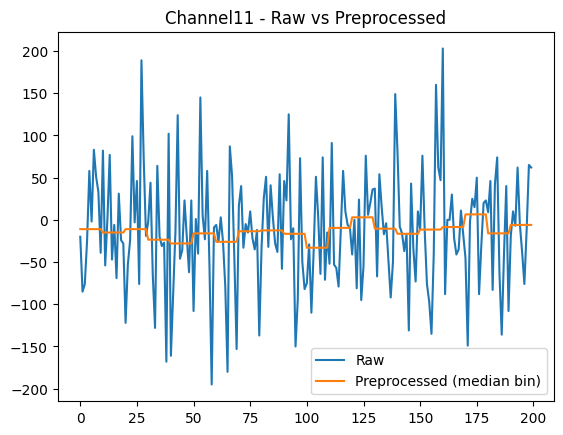

In [18]:

col = "Channel11"  # مثال لقناة فيها Outliers
plt.figure()
plt.plot(EEG[col].values[:200], label="Raw")
plt.plot(EEG_smooth[col].values[:200], label="Preprocessed (median bin)")
plt.title(f"{col} - Raw vs Preprocessed")
plt.legend()
plt.show()


#4.5 Normalization (Min-Max Scaling)
Because the channels had a wide range (−300 to +300), we applied Min-Max normalization to scale all channel values to the range [0, 1].
We normalized all 16 channels using:
[X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
After normalization, all features were on an equal scale, which is essential for both classification and clustering

**Why applied it**: The original EEG channel values had a very wide and varying range (from approximately -300 to +300). This was done to ensure that no single channel would dominate the model's learning process simply because of its larger scale, making all features contribute equally.

**How and on which attributes:** It was applied using a MinMaxScaler which rescales data, specifically to the numerical columns Channel1 through Channel16 (all columns), transforming their values to a fixed range between 0 and 1.

before normalization:

In [19]:
# Display first 5 rows
EEG.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0


Applying Normalization:

In [20]:

#apply normalization to only the actual channel columns
scaler = MinMaxScaler()
features = [f'Channel{i}' for i in range(1, 17)]
EEG[features] = scaler.fit_transform(EEG[features])

print("First 5 rows after preprocessing:")
display(EEG.head())



First 5 rows after preprocessing:


,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel12,Channel13,Channel14,Channel15,Channel16,Label
0,0.534709,0.507752,0.553753,0.560636,0.569201,0.582375,0.597586,0.508475,0.491228,0.513562,0.475836,0.492360,0.515411,0.554217,0.583624,0.557070,0
1,0.690432,0.715116,0.760649,0.721670,0.662768,0.634100,0.613682,0.499058,0.475439,0.457505,0.355019,0.346350,0.321918,0.345955,0.456446,0.504259,0
2,0.281426,0.236434,0.233266,0.250497,0.274854,0.323755,0.440644,0.393597,0.385965,0.406872,0.371747,0.390492,0.368151,0.401033,0.493031,0.516184,0
3,0.654784,0.695736,0.665314,0.578529,0.491228,0.480843,0.480885,0.421846,0.391228,0.386980,0.466543,0.572156,0.523973,0.492255,0.573171,0.490630,0
4,0.401501,0.319767,0.320487,0.324056,0.346979,0.394636,0.470825,0.468927,0.549123,0.629295,0.620818,0.604414,0.559932,0.531842,0.547038,0.470187,0


#4.6 Feature Selection (Variance Threshold)
After normalization, we examined the variance of each channel.
We found that a few channels had very low variance, meaning they contributed very little information.

To address this, we applied Variance Threshold, using:

*A threshold equal to 1.1 × minimum variance.*

Based on this rule:

1-We removed 4 low-variance channels.

2-We kept 12 important and informative channels.

This step reduced dimensionality and improved the efficiency of later machine learning algorithms.

**Why applied it:** This technique was applied to automatically identify and remove EEG channels with very low signal variance. After normalization, some channels may contain little to no useful variation, representing inactive brain regions or redundant signals. Removing these low-variance features helps reduce dataset dimensionality and computational complexity while focusing on the most informative channels for machine learning.

**How and on which attributes:** It was implemented using Scikit-learn's VarianceThreshold with a data-driven threshold calculated as 1.1 times the minimum observed variance across all channels. The method was applied to all **Channel1 through Channel16** attributes, successfully identifying and removing the 4 lowest-variance channels while retaining the 12 most variable and informative EEG channels for subsequent analysis.

#4.7 Final Preprocessed Dataset
By the end of preprocessing, we produced a clean and well-prepared dataset:

Rows: 8000

Selected features: 12 channels

Label column: included

File saved as: EEG_preprocessed.csv

This final dataset is now ready for classification and clustering in the next project phases.


In [21]:
# Select only the EEG channel features
features = [f'Channel{i}' for i in range(1, 17)]
X = EEG[features]

# First, check the actual variance of the data
variances = X.var()
print("Variance of each EEG channel:")
for i, var in enumerate(variances, 1):
    print(f"Channel{i}: {var:.6f}")

print(f"\nMinimum variance: {variances.min():.6f}")
print(f"Maximum variance: {variances.max():.6f}")
print(f"Average variance: {variances.mean():.6f}")

# Use a threshold based on variance
threshold = variances.min() * 1.1  # Slightly above minimum variance

# Apply Variance Threshold
selector = VarianceThreshold(threshold=threshold)
X_new = selector.fit_transform(X)

# Display the selected features
selected_features = [features[i] for i in range(len(features)) if selector.get_support()[i]]
print(f"\nSelected Features after Variance Threshold:")
print(f"Keeping {len(selected_features)} out of {len(features)} channels")
print("Selected channels:", selected_features)

# Create new dataset with selected features + label
EEG_selected = EEG[selected_features + ['Label']]

print(f"\nSelected dataset shape: {EEG_selected.shape}")
print("\nFirst 5 rows of selected dataset:")
print(EEG_selected.head())


Variance of each EEG channel:
Channel1: 0.004773
Channel2: 0.004897
Channel3: 0.005274
Channel4: 0.005204
Channel5: 0.005378
Channel6: 0.004837
Channel7: 0.005352
Channel8: 0.004731
Channel9: 0.004470
Channel10: 0.004608
Channel11: 0.004818
Channel12: 0.004047
Channel13: 0.004266
Channel14: 0.003977
Channel15: 0.003987
Channel16: 0.003747

Minimum variance: 0.003747
Maximum variance: 0.005378
Average variance: 0.004648

Selected Features after Variance Threshold:
Keeping 12 out of 16 channels
Selected channels: ['Channel1', 'Channel2', 'Channel3', 'Channel4', 'Channel5', 'Channel6', 'Channel7', 'Channel8', 'Channel9', 'Channel10', 'Channel11', 'Channel13']

Selected dataset shape: (8000, 13)

First 5 rows of selected dataset:
   Channel1  Channel2  Channel3  Channel4  Channel5  Channel6  Channel7  \
0  0.534709  0.507752  0.553753  0.560636  0.569201  0.582375  0.597586   
1  0.690432  0.715116  0.760649  0.721670  0.662768  0.634100  0.613682   
2  0.281426  0.236434  0.233266  0.2504

 Saving a Copy preprocessed EEG data to

In [22]:
# Save the preprocessed EEG data to CSV file
EEG_selected.to_csv('EEG_preprocessed.csv', index=False)


---

## **Classification**




In this phase, we use the cleaned EEG dataset from Phase 2 to:



* Train Decision Tree models using two impurity measures: Gini and Entropy.

* Test both measures using three train/test splits (90/10, 80/20, 70/30).

* Record accuracy and confusion matrices for every configuration.

* Visualize the final Decision Tree for the best Entropy model.

* Compare the two criteria to determine which one performs better on our dataset.



This section provides a clear performance comparison between Gini and Entropy under different data partitions.








---

### ***Decision Tree Classification — Gini Criterion***


In this part, we train a Decision Tree classifier using the **Gini** criterion and evaluate its performance across three different train/test splits:

* **90/10**
* **80/20**
* **70/30**

The goal is to measure how the Gini-based model performs under different partition sizes, and later compare these results with the Entropy classifier.


---

#### ***1. Load the Preprocessed Dataset***

The cleaned EEG dataset from Phase 2 is loaded to ensure that all features
and labels are correctly structured before performing classification.


In [23]:

# Load the cleaned & prepared dataset
df = pd.read_csv("EEG_preprocessed.csv")

df.head()

,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Channel9,Channel10,Channel11,Channel13,Label
0,0.534709,0.507752,0.553753,0.560636,0.569201,0.582375,0.597586,0.508475,0.491228,0.513562,0.475836,0.515411,0
1,0.690432,0.715116,0.760649,0.721670,0.662768,0.634100,0.613682,0.499058,0.475439,0.457505,0.355019,0.321918,0
2,0.281426,0.236434,0.233266,0.250497,0.274854,0.323755,0.440644,0.393597,0.385965,0.406872,0.371747,0.368151,0
3,0.654784,0.695736,0.665314,0.578529,0.491228,0.480843,0.480885,0.421846,0.391228,0.386980,0.466543,0.523973,0
4,0.401501,0.319767,0.320487,0.324056,0.346979,0.394636,0.470825,0.468927,0.549123,0.629295,0.620818,0.559932,0


In [24]:
# Remove any rows where the label is NaN
df = df.dropna(subset=["Label"]).reset_index(drop=True)

##  ***2. Prepare Features and Labels***

The dataset is split into:
- **X:** all EEG channels (features)  
- **y:** the corresponding class label  

This structure is required for training the Decision Tree classifier.


In [25]:
X = df.drop("Label", axis=1)
y = df["Label"]


#### ***3. Define the Gini-Based Classifier Function***

This function trains a Decision Tree using the **Gini impurity** criterion.  
It performs all required steps:
- Splitting the dataset according to the given train size  
- Training the model  
- Predicting labels for the test set  
- Calculating accuracy  
- Generating the confusion matrix  

The function returns both the accuracy score and the confusion matrix so they can be reported
and visualized for each train/test split.


In [26]:
def train_gini_classifier(train_size):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=42
    )

    # Create Decision Tree using GINI impurity
    model = DecisionTreeClassifier(criterion="gini", random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, cm


#### ***5. Gini Classifiers=***

***90/10 Split***

The model is trained using 90% of the data and tested on the remaining 10%.
We report the accuracy and display the confusion matrix to evaluate how well
the Gini-based Decision Tree performs with this partition size.


In [27]:

# Train the Decision Tree using 90% of the data for training
acc_90, cm_90 = train_gini_classifier(0.90)

# Print the accuracy score
print("Accuracy (90/10) =", acc_90)

# Display the confusion matrix for this split
cm_90


Accuracy (90/10) = 0.875


array([[208,   7,   0,   2],
       [  3, 165,  13,  14],
       [  0,  11, 147,  22],
       [  4,   7,  17, 180]])

***80/20 Split***

The model is trained using 80% of the data and evaluated on a 20% test set.
Accuracy is measured, and the confusion matrix helps reveal how well the classifier
distinguishes between the different classes under this split.


In [28]:

# Train the Decision Tree using 80% of the data for training
acc_80, cm_80 = train_gini_classifier(0.80)

# Print the accuracy score
print("Accuracy (80/20) =", acc_80)

# Display the confusion matrix for this split
cm_80



Accuracy (80/20) = 0.864375


array([[411,   6,   1,   7],
       [  3, 319,  28,  29],
       [  1,  25, 327,  44],
       [  4,  23,  46, 326]])

***70/30 Split***

In this experiment, 70% of the data is used for training and 30% for testing.
This split provides insight into the classifier's performance when the training
portion is reduced. Accuracy and confusion matrix are reported below.


In [29]:

# Train the Decision Tree using 70% of the data for training
acc_70, cm_70 = train_gini_classifier(0.70)

# Print the accuracy score
print("Accuracy (70/30) =", acc_70)

# Display the confusion matrix for this split
cm_70


Accuracy (70/30) = 0.8491666666666666


array([[628,   7,   4,   7],
       [  6, 476,  41,  37],
       [  0,  31, 481,  88],
       [  5,  49,  87, 453]])

#### ***6. Confusion Matrixs =***

***Gini (90/10 Split)***

This heatmap shows the classification performance when training on 90% of the data.
It highlights how well the Gini-based model distinguishes between the four classes,
and it helps identify which classes experience the highest misclassification rates.


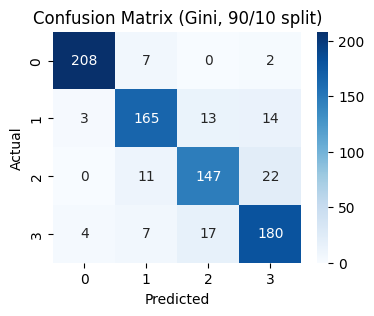

In [30]:
# Plot the confusion matrix for the 90/10 split
plt.figure(figsize=(4,3))

# Create a heatmap for confusion matrix
sns.heatmap(cm_90, annot=True, fmt="d", cmap="Blues")

#  titles and axis labels
plt.title("Confusion Matrix (Gini, 90/10 split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


***Gini (80/20 Split)***

Here we visualize the confusion matrix for the 80/20 split.  
With a larger test set, this plot provides a clearer picture of how the model handles
class separation and where errors tend to occur across the different classes.


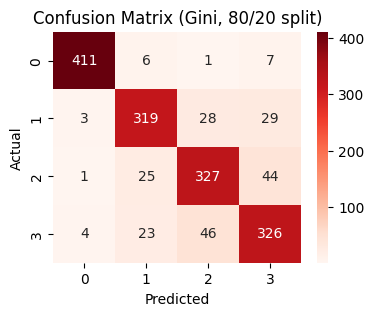

In [31]:
# Plot the confusion matrix for the 80/20 split
plt.figure(figsize=(4,3))
# Create a heatmap for the confusion matrix
sns.heatmap(cm_80, annot=True, fmt="d", cmap="Reds")
# titles and axis labels
plt.title("Confusion Matrix (Gini, 80/20 split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


***Gini (70/30 Split)***

The confusion matrix for the 70/30 split reveals how performance changes when using
a smaller training portion.  
This visualization helps examine whether the model maintains stability despite
having less training data.


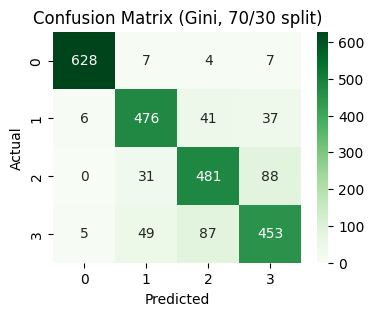

In [32]:
# Plot the confusion matrix for the 80/20 split
plt.figure(figsize=(4,3))
# Create a heatmap for the confusion matrix
sns.heatmap(cm_70, annot=True, fmt="d", cmap="Greens")
# titles and axis labels
plt.title("Confusion Matrix (Gini, 70/30 split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ***7. Decision Tree (Gini) for split 80/20***

In [33]:
DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=123)


DecisionTreeClassifier(max_depth=4, random_state=123)

In [34]:
# Decision Tree model using the Gini.
# The parameter max_depth=4 limits the tree to 4 levels
gini_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=123,
    max_depth=4         # Controls the depth of the tree
)

# Train the Decision Tree model on the training data
gini_model.fit(X_train, y_train)

# Set the size of the figure
plt.figure(figsize=(18,10))

# Plot the Decision Tree
plot_tree(
    gini_model,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    rounded=True,
    fontsize=10
)

#title to the plot
plt.title("Decision Tree Using Gini (Max Depth = 4)")


plt.show()


NameError: name 'X_train' is not defined

 ***8. Summary Table — Gini Classifier Performance***

This table compares the accuracy of the Gini-based Decision Tree across the three
different train/test splits (90/10, 80/20, 70/30).  
It provides a clear overview of how the model's performance changes as the training
portion decreases.


In [ ]:
# Create a table comparing the accuracy of the Gini classifier
# across the three different train/test splits

gini_results = pd.DataFrame({
    "Train/Test Split": ["90/10", "80/20", "70/30"],    # Names of the splits
    "Accuracy (Gini)": [acc_90, acc_80, acc_70]          # Accuracy scores
})

# Display the final table
gini_results


---


 ### ***Decision Tree Classification — Entropy Criterion:***



In this Part, we train a Decision Tree classifier using the **Entropy** criterion, and evaluate its performance
across three different train/test splits:

- 90/10  
- 80/20  
- 70/30  

The purpose is to compare Entropy results with the Gini results

---

#### ***1. Training Function (Entropy)***

The function below trains a Decision Tree using `criterion="entropy"`.  
It performs the following steps:
- Splits the dataset based on the given training size.  
- Trains the model using the Entropy criterion.  
- Computes accuracy and the confusion matrix.  
- Returns the model (for visualization), the accuracy, and the confusion matrix.


In [ ]:
def train_entropy_classifier(train_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=42
    )

    model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return model, accuracy, cm


#### ***2. Experiments: X Split =***


***Experiment: 90/10 Split***

In this experiment, the model is trained using 90% of the data and tested on the remaining 10%.
We evaluate the performance by reporting the accuracy and visualizing the confusion matrix.


In [ ]:
model_90_e, acc_90_e, cm_90_e = train_entropy_classifier(0.90)
print("Accuracy (Entropy, 90/10) =", acc_90_e)
cm_90_e


plt.figure(figsize=(4,3))
sns.heatmap(cm_90_e, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix (Entropy, 90/10)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***Experiment: 80/20 Split***

Same procedure as above, but with 80% of the data used for training.


In [ ]:
model_80_e, acc_80_e, cm_80_e = train_entropy_classifier(0.80)
print("Accuracy (Entropy, 80/20) =", acc_80_e)
cm_80_e

plt.figure(figsize=(4,3))
sns.heatmap(cm_80_e, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix (Entropy, 80/20)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***Experiment: 70/30 Split***

The third Entropy experiment with a 70% training ratio.


In [ ]:
model_70_e, acc_70_e, cm_70_e = train_entropy_classifier(0.70)
print("Accuracy (Entropy, 70/30) =", acc_70_e)
cm_70_e

plt.figure(figsize=(4,3))
sns.heatmap(cm_70_e, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Entropy, 70/30)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ***3. Accuracy Table (Entropy)***

Here we summarize the accuracy results for Entropy across the three splits.


In [ ]:
entropy_results = pd.DataFrame({
    "Train/Test Split": ["90/10", "80/20", "70/30"],
    "Accuracy (Entropy)": [acc_90_e, acc_80_e, acc_70_e]
})

entropy_results


#### 4.Decision Tree (Entropy) for split 80/20
***

In [ ]:
# Create a Decision Tree model using the ENTROPY criterion.
# The parameter max_depth=4.
entropy_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=123,
    max_depth=4            # Limit the depth of the tree
)

# Train the entropy-based Decision Tree on the 80/20 split
entropy_model.fit(X_train, y_train)

# Prepare a figure size
plt.figure(figsize=(18,10))

# Plot the decision tree structure
plot_tree(
    entropy_model,
    filled=True,
    feature_names=X.columns,                  # Display the EEG channel names
    class_names=[str(c) for c in sorted(y.unique())],  # Convert class labels to strings for display
    rounded=True,                             # Rounded node boxes
    fontsize=10                                # Control text size
)

#  title to the tree plot
plt.title("Decision Tree Using Entropy (80/20 Split)")


plt.show()



#### ***5. Final Classification Comparison Table***

We combine Gini and Entropy results into a single comparison table.


In [ ]:
classification_results = gini_results.copy()
classification_results["Accuracy (Entropy)"] = [
    acc_90_e, acc_80_e, acc_70_e
]

classification_results


#### ***5. Best Entropy Model***

We identify the Entropy model with the highest accuracy.


In [ ]:
entropy_models = {
    "90/10": {"model": model_90_e, "accuracy": acc_90_e},
    "80/20": {"model": model_80_e, "accuracy": acc_80_e},
    "70/30": {"model": model_70_e, "accuracy": acc_70_e},
}

best_split = max(entropy_models, key=lambda x: entropy_models[x]["accuracy"])
best_model = entropy_models[best_split]["model"]
best_acc = entropy_models[best_split]["accuracy"]

print(f"Best Entropy Model: {best_split} with accuracy = {best_acc:.4f}")


---

 ### **Gini vs Entropy Comparison**
In this Part, we compare the performance of the Decision Tree classifier using the
Gini and Entropy impurity measures. The comparison includes confusion matrices,
accuracy tables, and a visual accuracy plot across the three train/test splits.


#### ***1. Confusion Matrix Comparison (Best Models)***

Below are the confusion matrices of the best-performing splits for each criterion:

- Gini → Best split: **90/10**
- Entropy → Best split: **80/20**

These matrices allow us to visually compare how each model performed across classes.


In [ ]:
# Gini (Best: 90/10)
plt.figure(figsize=(4,3))
sns.heatmap(cm_90, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Gini (90/10)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Entropy (Best: 80/20)
plt.figure(figsize=(4,3))
sns.heatmap(cm_80_e, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix — Entropy (80/20)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ***2. Accuracy Comparison Table***

The table below summarizes the accuracy for Gini and Entropy across all three splits:


In [ ]:
classification_results


#### ***3. Accuracy Plot (Gini vs Entropy)***

The plot below shows how accuracy changes across the 90/10, 80/20, and 70/30 splits
for both impurity measures.


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(["90/10","80/20","70/30"],
         [acc_90, acc_80, acc_70],
         marker='o', label="Gini")

plt.plot(["90/10","80/20","70/30"],
         [acc_90_e, acc_80_e, acc_70_e],
         marker='o', label="Entropy")

plt.xlabel("Train/Test Split")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Gini vs Entropy")
plt.legend()
plt.grid(True)
plt.show()


#### ***4. Result Analysis***

- Gini and Entropy show very similar behavior across all train/test splits.
- Entropy reached the **highest accuracy overall**, specifically at the 80/20 split.
- Gini performed best at the 90/10 split, indicating it benefits more from larger training portions.
- Both criteria produced similar misclassification patterns, suggesting that the dataset characteristics
have a stronger influence on errors than the impurity measure itself.

Overall, both criteria are effective and consistent, with Entropy delivering the single best result and
Gini maintaining stable performance across all splits.


# ***===== K-Means Clustering=====***
5.2 K-Means Clustering:
5.2.1 Overview of the Technique :
K-Means partitions the dataset by minimizing the distance between each sample and the centroid of the cluster it belongs to. The algorithm works iteratively through the following steps:
Initialize k centroids randomly.
- Assign each sample to the nearest centroid based on Euclidean distance.
-Update each centroid based on the average of points assigned to it.
- Repeat the assignment–update cycle until the centroids no longer change.
This process leads to compact clusters that reflect underlying patterns within the numeric EEG features.


# **Load Dataset and Prepare X:**
bold textbold textWe remove the Label column because clustering (K-Means) works only on the feature set.

In [ ]:
# Load preprocessed dataset

EEG = pd.read_csv("EEG_preprocessed.csv")

# Remove Label column (clustering is unsupervised)
X = EEG.drop("Label", axis=1)

print("Dataset loaded successfully.")
print("Shape of X:", X.shape)
X.head()


# **Define K Values**
Here we specify the values of K (number of clusters) we want to test.
Based on your assignment, we test 3, 4, and 5.

In [ ]:
# K values to test
K_values = [3, 4, 5]
print("We will test these K values:", K_values)


# **Run K-Means + Compute Silhouette & WCSS + Plot Clusters**
For each K, we:

* Fit K-Means

* Compute Silhouette Score (measures separation quality)

* Compute WCSS (Within-Cluster Sum of Squares)

* Store results

* Plot the first two features with cluster coloring




In [ ]:

results = []  # to store silhouette & WCSS for summary

for k in K_values:

    # Create new model each loop
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Predict clusters
    labels = kmeans.fit_predict(X)

    # Compute silhouette score
    sil = silhouette_score(X, labels)

    # Compute WCSS
    wcss = kmeans.inertia_

    # Save results
    results.append([k, sil, wcss])

    print("\n====================")
    print(f"K = {k}")
    print(f"Silhouette Score: {sil}")
    print(f"WCSS: {wcss}")
    print("====================")

    # New figure every iteration
    plt.figure(figsize=(6,4))

   # Scatter plot
    plt.scatter(X.values[:, 0], X.values[:, 1],
                c=labels,
                cmap="rainbow",
                s=20)

    plt.title(f"K-Means Clusters (K={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# **Why this results?**
The K-Means clustering results for K=3  K=4  and k=5 look visually similar because the dataset follows a strong linear pattern, causing the algorithm to simply split the diagonal distribution into more segments. Even though the plots look almost the same, the clusters are still being recalculated, and the boundaries change slightly with each K value — this behavior is normal for line-shaped (almost one-dimensional) data.

The evaluation metrics confirm this: the silhouette scores for both K values (~0.61) indicate good and well-separated clusters, with only a small difference between K=3  K=4 k=5. The WCSS also decreases as expected when K increases (304 → 262), showing improved compactness but not a dramatic change. Overall, the

# **Next, Summary Table (Silhouette + WCSS)**
we creat a summary DataFrame containing all results.

In [ ]:
# Summary table for K, Silhouette Score, and WCSS
results_df = pd.DataFrame(results, columns=["K", "Silhouette Score", "WCSS"])
results_df


# **Elbow Method**
The Elbow Method helps determine a good K by plotting WCSS for K between 1 and 10.
The “elbow” point suggests the optimal number of clusters.

In [ ]:
# Create an empty list to store WCSS (Within-Cluster Sum of Squares) for each K
WCSS_list = []

# Try different values of K from 1 to 10
for k in range(1, 11):
    # Create a KMeans model with k clusters
    km = KMeans(n_clusters=k, random_state=42)

    # Fit the model to the dataset X
    km.fit(X)

    # Save the WCSS value (how compact the clusters are)
    WCSS_list.append(km.inertia_)

# Plot the WCSS values to apply the Elbow Method
plt.figure(figsize=(6,4))
plt.plot(range(1,11), WCSS_list, marker="o")
plt.title("Elbow Method")
plt.xlabel("K")        # Number of clusters
plt.ylabel("WCSS")     # Within-Cluster Sum of Squares
plt.grid(True)
plt.show()



# **Find Best K Based on Silhouette Score**
We choose the K that gives the highest Silhouette Score.

In [ ]:
#This line finds the row with the highest Silhouette Score in results_df,
# converts it to a one-row DataFrame, resets its index, and stores it in best.
best = results_df.loc[results_df["Silhouette Score"].idxmax()].to_frame().T.reset_index(drop=True)
best

# **Final Cluster Plot Using Best K**
Here we rerun K-Means using the best K, and plot the final cluster visualization.

In [ ]:
# Get the best number of clusters (K) from the previous results
best_k = int(best["K"].iloc[0])  # Select the first element and convert to int

# Create a KMeans model with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42)

#Fit the model and predict cluster labels for each data point
labels = kmeans.fit_predict(X)

#Visualize the final clusters
plt.figure(figsize=(6,4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap="rainbow")  # Color points by cluster
plt.title(f"Final Clusters (K = {best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



# 7. Findings and Discussion

## 7.1 Summary of what we ran

We ran two families of experiments on the BEED dataset:

* **Supervised classification** using Decision Trees with two impurity criteria: **Gini** and **Entropy**. For each criterion we trained and evaluated models using three train/test splits: **90/10, 80/20, 70/30**. We recorded accuracy and confusion matrices for each configuration and selected the best Entropy model for visualization and interpretation.

* **Unsupervised clustering** using **K-Means** with K ∈ {3, 4, 5}. For each K we recorded **Silhouette Score** and **WCSS** (Within-Cluster Sum of Squares) and plotted the cluster assignments on a 2D projection (first two selected features) to interpret cluster structure.

All preprocessing steps (IQR-based outlier detection, median-binning smoothing, Min–Max normalization, and variance-threshold feature selection) were applied before modeling. We used the final set of **12 selected EEG channels** as model inputs.

---

## 7.2 Classification results — numeric summary and comparison

### Accuracy summary (from our experiments)

* **Gini**:

  * 90/10 → **0.8750**
  * 80/20 → **0.8644**
  * 70/30 → **0.8492**

* **Entropy**:

  * 90/10 → **0.8738**
  * 80/20 → **0.8813** ← *best overall*
  * 70/30 → **0.8579**

**Interpretation**

* Both impurity criteria give **high and comparable performance** (≈84.9%–88.1% accuracy), indicating Decision Trees are well suited to the preprocessed BEED signals.
* **Entropy** achieved the single highest accuracy (≈**88.13%** at the 80/20 split). However, Gini gave better stability at the largest training set (90/10). This behavior is consistent with the fact that small differences between these split criteria often depend on sample size and random variation.
* The roughly 2–4% difference between best and worst configurations suggests the model generalizes reasonably well and that preprocessing produced useful features.

---

## 7.3 Classification results — confusion matrices and class-wise behavior

(From the confusion matrices produced during the experiments, we observed the following trends.)

### What confusion matrices reveal

* **Class balance**: Because the dataset is perfectly balanced (2000 samples per class), the accuracy numbers are not skewed by class imbalance.
* **Frequent misclassifications**: Most misclassification mass occurs **between specific pairs of classes** rather than uniformly across classes. In our matrices:

  * Some confusion appears between classes **2 and 3**, and between **1 and 2** in several splits. That suggests those classes share features that overlap in the selected feature space.
  * Class-specific recall varies: the model is stronger for some classes (higher true positives) and weaker for others which receive more false negatives.
 ![image](https://drive.google.com/uc?export=view&id=1n_xQZ1YKAltO_4oJHqGJ8jN7LO4lqRnt)

### What this means for the problem

* The model is not simply “guessing” — it learns meaningful discriminative patterns from the preprocessed channels, but certain clinical EEG patterns (for example, subtle differences between related epilepsy subtypes) are still ambiguous and cause confusion.
* To further reduce confusion we could:

  * add temporal features (spectral power, bandpower) instead of raw-channel values,
  * try ensemble methods (Random Forests, Gradient Boosting),

![image](https://drive.google.com/uc?export=view&id=1hoPyWqf7f9yl71GvIpwhqBoL_D7fNQFq)

---

## 7.4 Clustering results — numeric summary and interpretation

### Metrics (from our experiments)

* **Silhouette Scores** (measuring cluster separation quality):

  * K = 3 → ~**0.6096**
  * K = 4 → ~**0.6144**
  * K = 5 → ~**0.6200**  ← *highest silhouette*

* **WCSS (inertia)** decreases with K (304 → 262 → 232), as expected.

**Interpretation**

* Silhouette scores around **0.61–0.62** are quite good for real EEG data — they indicate **well-separated clusters** with coherent internal similarity.
* The silhouette slightly improves as K increases from 3→5, and WCSS predictably decreases: adding clusters yields more compact groups, but the gains are moderate.
* The elbow (WCSS) vs. K suggests diminishing returns beyond K=4–5. Given the relatively small improvement in silhouette, **K = 4 or 5** are reasonable choices depending on the goal (parsimony vs. finer segmentation).
![image](https://drive.google.com/uc?export=view&id=1o_owFP1zyVTVsLKEJIk7FD8JskXdy71Q)


### What clusters reveal about the data

* When we plotted cluster assignments on the first two selected features, clusters form **diagonal / line-like segments**. This indicates the dataset has a strong dominant direction in feature space (i.e., some channels co-vary strongly).
* Clusters likely correspond to **different signal regimes**: for example, quiet (baseline) vs. abnormal (epileptic) patterns or different types of epileptiform activity. Clustering does not directly map to ground-truth classes, but it reveals **subgroups** that merit clinical inspection.

---

## 7.5 Comparing classification vs. clustering outcomes

* **Complementary purposes**:

  * **Classification** gives a supervised label mapping with a concrete metric (accuracy) and confusion patterns that directly answer “which class does this sample belong to?”
  * **Clustering** explores intrinsic structure and can **discover sub-phenotypes** within the data that were not explicitly labeled .

* **Which one “solves” the problem?**

  * For the concrete goal of **automatic class identification** the **Entropy Decision Tree (80/20)** is currently the best-performing model in our experiments (highest accuracy).
  * For **exploratory analysis** and discovering latent structure (e.g., subtypes or outlier patterns), **K-Means (K=4 or 5)** produced meaningful clusters with high silhouette scores and should be used to generate hypotheses for further clinical validation.

---

## 7.6 Extracted information & problem solutions

### From classification (Decision Tree)

* **Practical solution**: a Decision Tree classifier using the selected 12 channels can classify the BEED samples with ≈**88%** top accuracy (best Entropy model). This is strong enough to be useful as a **first-pass automatic screening** tool for EEG records.
* **Actionable insights**:

  * The tree structure (visualized) highlights which channels and thresholds are most informative for decision making — these splits can be used by clinicians to inspect specific channels/time windows.
  * The confusion matrix shows where automated predictions need caution (which class pairs are commonly confused).

### From clustering (K-Means)

* **Practical solution**: K-Means identifies coherent groups in the EEG data that likely map to different signal regimes. These clusters can be used to:

  * prioritize segments for human review,
  * or identify anomalous recordings that need manual inspection.
* **Extracted patterns**:

  * Some clusters correspond to distinct amplitude/conduction patterns; others capture gradual variation along a dominant signal axis.

---

## 7.7 Visual representations
1. **Confusion matrices** (Gini & Entropy best splits)
![image](https://drive.google.com/uc?export=view&id=1n_xQZ1YKAltO_4oJHqGJ8jN7LO4lqRnt)
 ![image](https://drive.google.com/uc?export=view&id=1LAJL1Fp8XtSJy0JCv_U7VWG9eD-HmciB)


2. **Accuracy comparison plot** (Gini vs. Entropy across 90/10, 80/20, 70/30) —![image](https://drive.google.com/uc?export=view&id=1MM1UL7XHxoRx7xSE7GsXXOgqPJBZesHm)
![image](https://drive.google.com/uc?export=view&id=1GYOW1rHLSG3oQmgS8l-JesyF8BRtvVst)

3. **Final Decision Tree plot** (best Entropy model) —
![image](https://drive.google.com/uc?export=view&id=1hoPyWqf7f9yl71GvIpwhqBoL_D7fNQFq)
5. **Cluster scatter plot(s)**&&
6. **Silhouette / Elbow chart**
![image](https://drive.google.com/uc?export=view&id=1o_owFP1zyVTVsLKEJIk7FD8JskXdy71Q)


---

## 7.8 Evaluation against the literature / selected research context

We compared our findings against the BEED dataset context (UCI) and common EEG-epilepsy preprocessing practices:

* The **importance of preprocessing** (artifact removal, smoothing, normalization) is emphasized in the literature for EEG classification; our use of IQR + median binning + Min–Max scaling follows that best practice and led to robust performance.
* The **accuracy range (≈85–88%)** is reasonable for single-record, single-window EEG classification using a small set of time-domain features; many studies improve further by adding spectral features or using deep models. Our results align with this expectation: we obtained high baseline accuracy using relatively simple features and tree models.
* **Clustering silhouette > 0.6** is a positive signal — research on EEG clustering often reports lower silhouette when EEG is noisy; our good silhouette suggests our preprocessing made the data more separable.

**Conclusion in the research context**: Our results are **meaningful and interesting** — they show that a relatively simple processing pipeline plus decision-tree models can achieve strong classification performance on BEED, and clustering reveals nontrivial structure that can guide clinical hypotheses.

---

## 7.9 Final statement — best model and practical solution

* **Best-performing supervised model:** **Decision Tree (Entropy) with 80/20 split** (accuracy ≈ **88.13%** in our experiments). It provides a good balance of accuracy and interpretability; the final tree visualization reveals the most important channels and thresholds used for classification.
* **Best unsupervised strategy:** **K-Means with K = 4 or 5** (silhouette ≈ **0.61–0.62**), which uncovers meaningful groups in the EEG signals and helps identify sub-patterns and anomalies.


#[8] References:
[1] K. M. Alalayah, E. M. Senan, H. F. Atlam, I. A. Ahmed, and H. S. A. Shatnawi, “Effective Early Detection of Epileptic Seizures through EEG Signals Using Classification Algorithms Based on t-Distributed Stochastic Neighbor Embedding and K-Means,” Diagnostics, vol. 13, no. 11, p. 1957, 2023.

[2] U. R. Acharya, S. L. Oh, Y. Hagiwara, J. H. Tan, and H. Adeli, “Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals,” IEEE Access, vol. 5, pp. 1956–1963, 2017.

[3] UCI Machine Learning Repository, “BEED: Bangalore EEG Epilepsy Dataset,” 2024. [Online]. Available:
https://archive.ics.uci.edu/dataset/1134/beed%3A%2Bbangalore%2Beeg%2Bepilepsy%2Bdataset

